In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import h2o 
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 19.0.2+7-44, mixed mode, sharing)
  Starting server from C:\Users\PHU\AppData\Local\Programs\Python\Python39\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\PHU\AppData\Local\Temp\tmp_7tzz4b1
  JVM stdout: C:\Users\PHU\AppData\Local\Temp\tmp_7tzz4b1\h2o_PHU_started_from_python.out
  JVM stderr: C:\Users\PHU\AppData\Local\Temp\tmp_7tzz4b1\h2o_PHU_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Ho_Chi_Minh
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_PHU_09izam
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.943 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [18]:
name = "airlines_all.05p.csv"
airlines = h2o.upload_file(name)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
airlines.head()

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
1988,1,9,6,1348,1331,1458,1435,PI,942,nan,70,64,nan,23,17,SYR,BWI,273,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,29,5,1339,1331,1442,1435,PI,942,nan,63,64,nan,7,8,SYR,BWI,273,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,23,6,950,950,1041,1050,PI,943,nan,51,60,nan,-9,0,LGA,SYR,198,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO
1988,1,18,1,1124,1110,1213,1145,PI,943,nan,49,35,nan,28,14,SYR,BUF,134,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,10,7,1503,1500,1602,1550,PI,944,nan,59,50,nan,12,3,JFK,UCA,191,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,30,6,1500,1500,1558,1550,PI,944,nan,58,50,nan,8,0,JFK,UCA,191,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,NO
1988,1,20,3,1750,1705,1900,1810,PI,944,nan,70,65,nan,50,45,SYR,BOS,264,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,10,7,1616,1610,1632,1630,PI,944,nan,16,20,nan,2,6,UCA,SYR,37,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,30,6,1610,1610,1627,1630,PI,944,nan,17,20,nan,-3,0,UCA,SYR,37,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO
1988,1,22,5,2026,2031,2135,2142,PI,945,nan,69,71,nan,-7,-5,SYR,DCA,298,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO


In [4]:
airlines.describe

<bound method H2OFrame.describe of H2OFrame({'_ex': <Expr()#Key_Frame__upload_83ffed27b973ec71c6b69a8fe5ef46f6.hex>})>

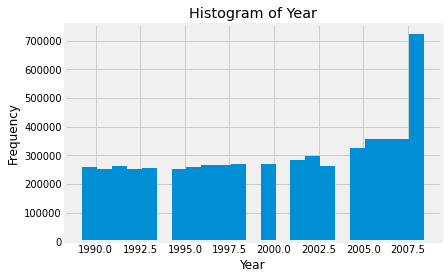

breaks,counts,mids_true,mids,widths
1988.83,nan,nan,nan,nan
1989.67,260105,994,1989.25,0.833333
1990.5,252060,994.5,1990.08,0.833333
1991.33,263545,995,1990.92,0.833333
1992.17,253846,995.5,1991.75,0.833333
1993,254608,996,1992.58,0.833333
1993.83,0,0,1993.42,0.833333
1994.67,253525,996.5,1994.25,0.833333
1995.5,259002,997,1995.08,0.833333
1996.33,266372,997.5,1995.92,0.833333


In [5]:
%matplotlib inline
airlines["Year"].hist()

Text(0, 0.5, 'Arrival Time')

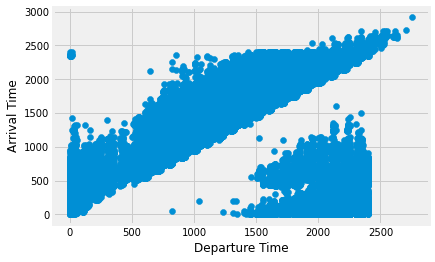

In [7]:
# Convert H2O Frame into Pandas dataframe for plotting with matplotlib
airlines_pd = airlines.as_data_frame(use_pandas = True)
plt.scatter(airlines_pd.DepTime, airlines_pd.ArrTime)
plt.xlabel("Departure Time")
plt.ylabel("Arrival Time")

In [9]:
from h2o.estimators.aggregator import H2OAggregatorEstimator

# Build an aggregated frame with around 1000 records
agg_frame = H2OAggregatorEstimator(target_num_exemplars = 1000)
agg_frame.train(training_frame=airlines)

# Use the aggregated model to create a new dataframe using aggregated_frame
small_airlines_data = agg_frame.aggregated_frame

aggregator Model Build progress: |

c:\Users\PHU\AppData\Local\Programs\Python\Python39\lib\site-packages\h2o\estimators\estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [CancellationCode]
  warnings.warn(mesg["message"], RuntimeWarning)


███████████████████████████████████████████████| (done) 100%


In [12]:
small_airlines_data.head()

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed,counts
1988,1,9,6,1348,1331,1458,1435,PI,942,nan,70,64,nan,23,17,SYR,BWI,273,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES,160254
1988,1,23,6,950,950,1041,1050,PI,943,nan,51,60,nan,-9,0,LGA,SYR,198,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO,175286
1988,1,18,1,1124,1110,1213,1145,PI,943,nan,49,35,nan,28,14,SYR,BUF,134,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES,46915
1988,1,30,6,1500,1500,1558,1550,PI,944,nan,58,50,nan,8,0,JFK,UCA,191,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,NO,27691
1988,1,22,5,2026,2031,2135,2142,PI,945,nan,69,71,nan,-7,-5,SYR,DCA,298,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO,50607
1988,1,15,5,1917,1910,2015,2016,PI,948,nan,58,66,nan,-1,7,CHO,LGA,305,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,YES,95209
1988,1,25,1,1409,1410,1600,1530,PI,948,nan,111,80,nan,30,-1,EWR,ROA,389,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,NO,125362
1988,1,18,1,nan,1826,nan,1851,PI,948,nan,nan,25,nan,nan,nan,LYH,CHO,70,nan,nan,1,nan,0,nan,nan,nan,nan,nan,YES,YES,46623
1988,1,13,3,2106,2052,2156,2152,PI,950,nan,50,60,nan,4,14,BWI,BGM,212,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES,156128
1988,1,6,3,1710,1710,1832,1825,PI,953,nan,82,75,nan,7,0,JFK,BUF,301,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,NO,39551


Text(0, 0.5, 'ArrTime')

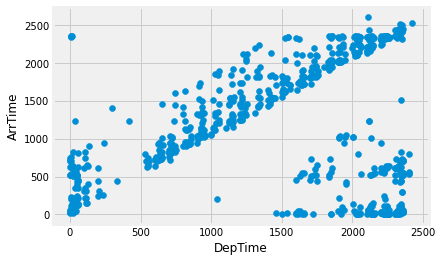

In [14]:
small_airlines_pd = small_airlines_data.as_data_frame(use_pandas = True)
plt.scatter(small_airlines_pd.DepTime, small_airlines_pd.ArrTime)
plt.xlabel("DepTime")
plt.ylabel("ArrTime")

In [15]:
h2o.cluster().shutdown()

H2O session _sid_b298 closed.


# Build Models with H2O

In [16]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 19.0.2+7-44, mixed mode, sharing)
  Starting server from C:\Users\PHU\AppData\Local\Programs\Python\Python39\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\PHU\AppData\Local\Temp\tmpgmzbf7z5
  JVM stdout: C:\Users\PHU\AppData\Local\Temp\tmpgmzbf7z5\h2o_PHU_started_from_python.out
  JVM stderr: C:\Users\PHU\AppData\Local\Temp\tmpgmzbf7z5\h2o_PHU_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Ho_Chi_Minh
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_PHU_uz5i1o
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.943 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [23]:
# Import the dataset 
test = "./Black friday dataset/test.csv"
train = "./Black friday dataset/train.csv"
test_df = h2o.upload_file(test)
train_df = h2o.upload_file(train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [26]:
train, validation = train_df.split_frame(ratios=[.8], seed=1234)

In [69]:
# Identify predictors and response
print(f"Column names:  {train_df.col_names}")
predictors= ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
response_col = 'Purchase'

Column names:  ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [70]:
# Generate a GLM model using the training dataset
glm_model = H2OGeneralizedLinearEstimator(family = "gaussian", model_id = "glm_model", seed = 1234)
glm_model.train(x = predictors, y = response_col, training_frame = train, validation_frame = validation)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm_model


GLM Model: summary
    family    link      regularization                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 3.4422 )  18                            17                             1                       py_21_sid_9c52

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 23205568.05680803
RMSE: 4817.215799277424
MAE: 3849.4365246412817
RMSLE: 0.7343726988378391
Mean Residual Deviance: 23205568.05680803
R^2: 0.07920420065066414
Null degrees of freedom: 440350
Residual degrees of freedom: 440333
Null deviance: 11097569196779.855
Residual deviance: 10218595099383.473
AIC: 8718010.166484071

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 23321662.078232896
RMSE: 4829.250674611217
MAE: 3863.766048248653
RMSLE: 0.7379020766494685
Mean Residual Deviance: 23321662.078232896
R^2: 0.07999514384674544
Null degrees of freedom: 109716
Residual degrees of freedom: 109699
Null deviance: 2781274212318.671
Residual deviance: 2558782798237.4785
AIC: 2172738.5441740006

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae        training_r2          validation_rmse    validation_deviance    validation_mae     validation_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  ------------------  -------------------  -----------------  ---------------------  -----------------  -------------------
    2023-03-20 22:53:31  0.000 sec   0             11097569196779.855         25201644.13565509
    2023-03-20 22:53:31  0.157 sec   1                                                           4817.215799277424  23205568.05680803    3849.4365246412817  0.07920420065066414  4829.250674611217  23321662.078232896     3863.766048248653  0.07999514384674544

Variable Importances: 
variable                    relative_importance    scaled_importance    percentage
--------------------------  ---------------------  -------------------  ------------
Product_Category_1          604.696                1                    0.516414
Product_Category_2          232.835                0.385045             0.198842
City_Category.C             66.8927                0.110622             0.0571267
Gender.F                    53.6387                0.0887036            0.0458078
Gender.M                    53.6387                0.0887036            0.0458078
City_Category.A             43.7118                0.0722871            0.0373301
Occupation                  32.5519                0.0538319            0.0277996
City_Category.B             22.1809                0.0366811            0.0189427
Age.18-25                   12.2523                0.0202618            0.0104635
Age.51-55                   11.8639                0.0196196            0.0101318
Product_Category_3          11.2175                0.0185507            0.00957983
Age.36-45                   6.6539                 0.0110037            0.00568247
Stay_In_Current_City_Years  6.57539                0.0108739            0.00561542
Age.0-17                    5.04489                0.00834284           0.00430836
Age.26-35                   3.30628                0.00546767           0.00282358
Age.55+                     2.34441                0.003877             0.00200214
Marital_Status              1.54758                0.00255927           0.00132164
Age.46-50                   0                      0                    0

[tips]
Use `model.expla

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

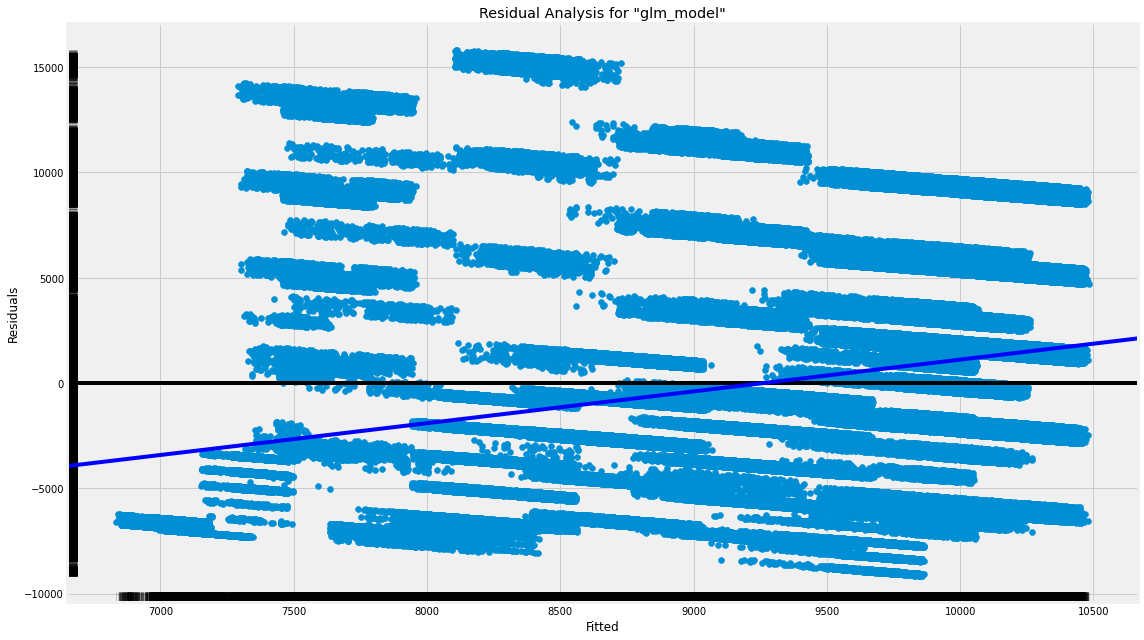

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

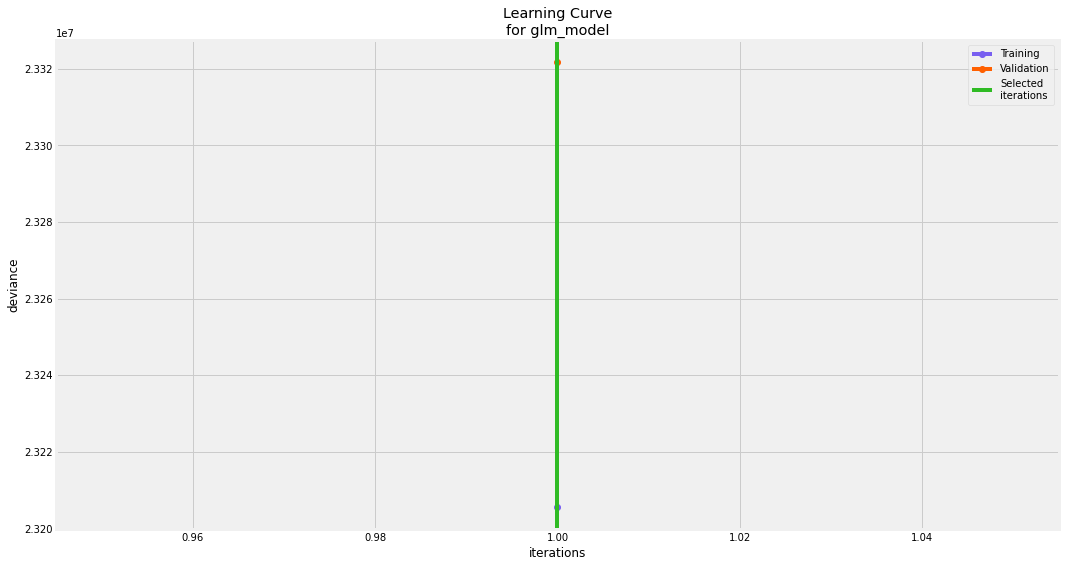

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

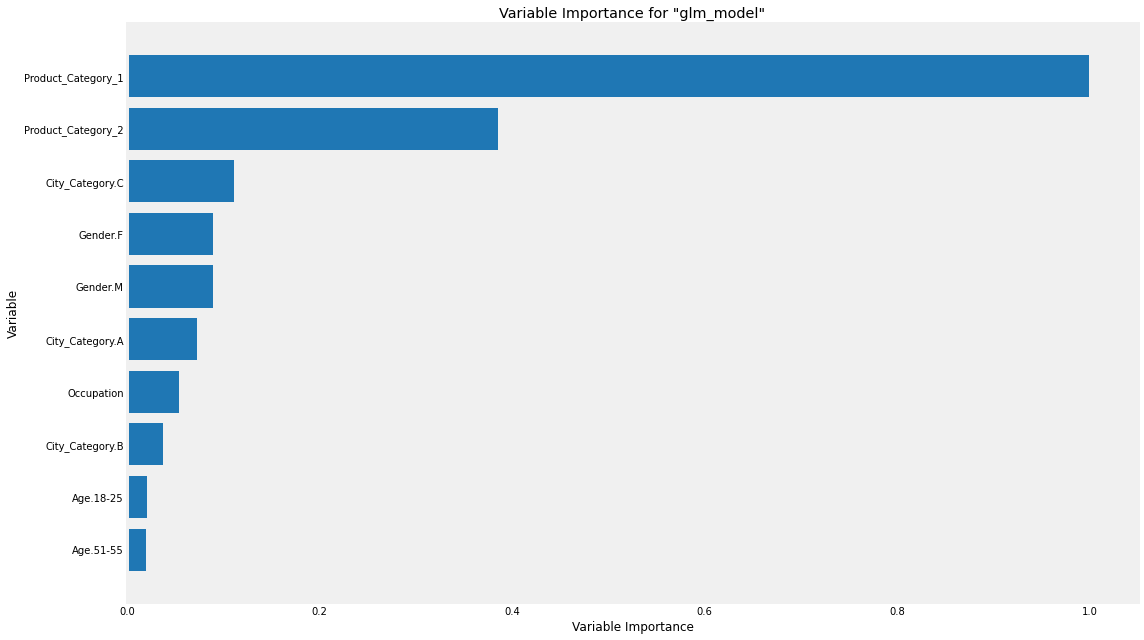

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

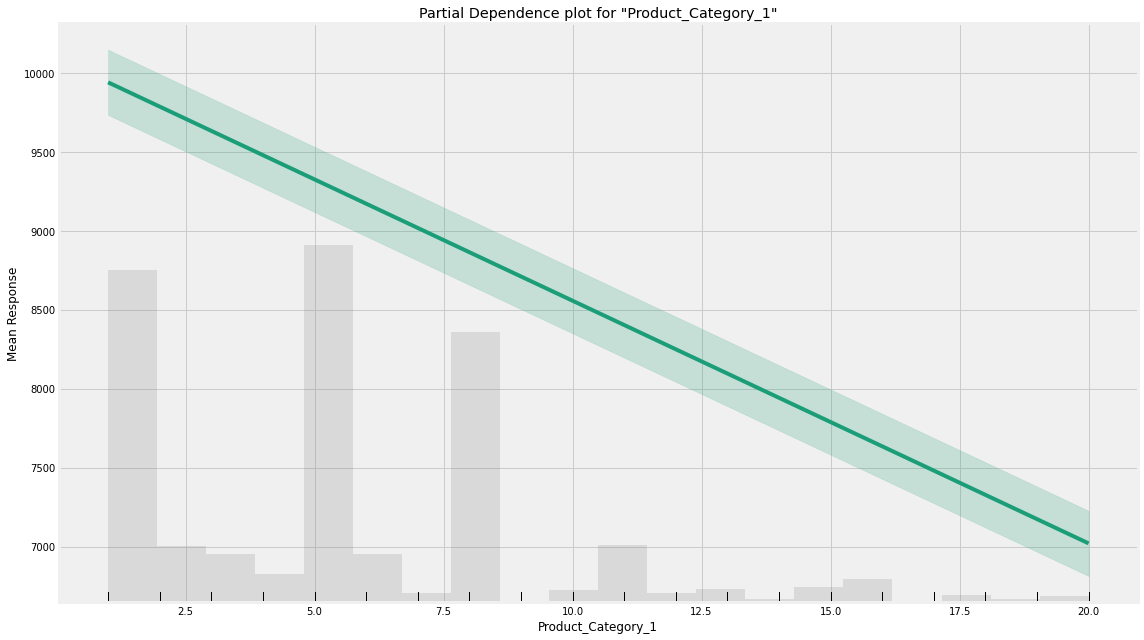

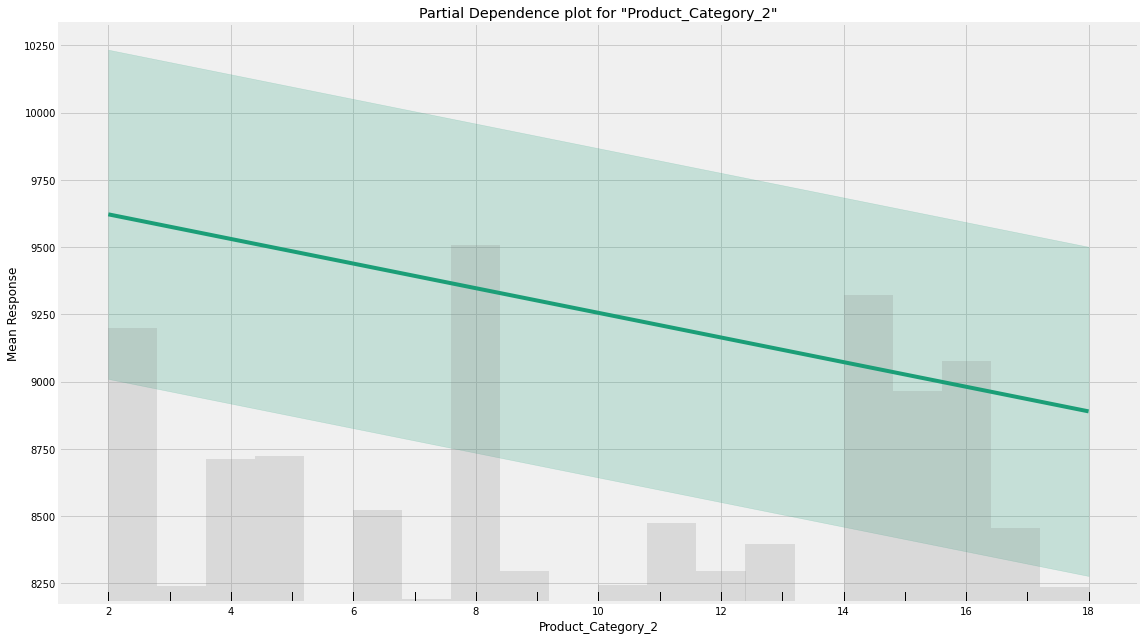

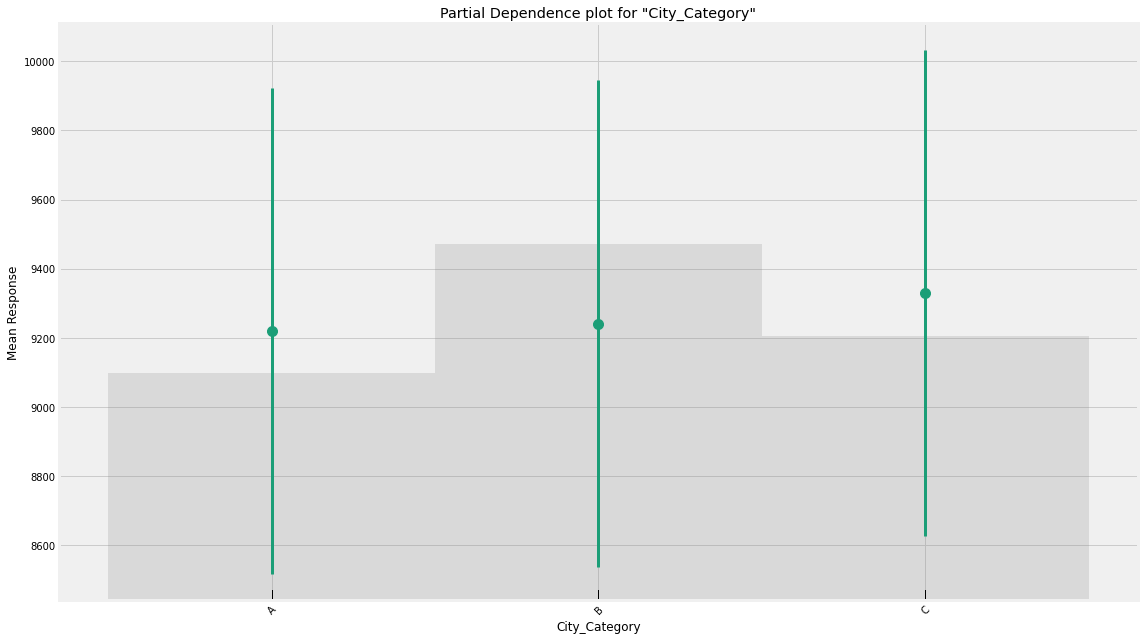

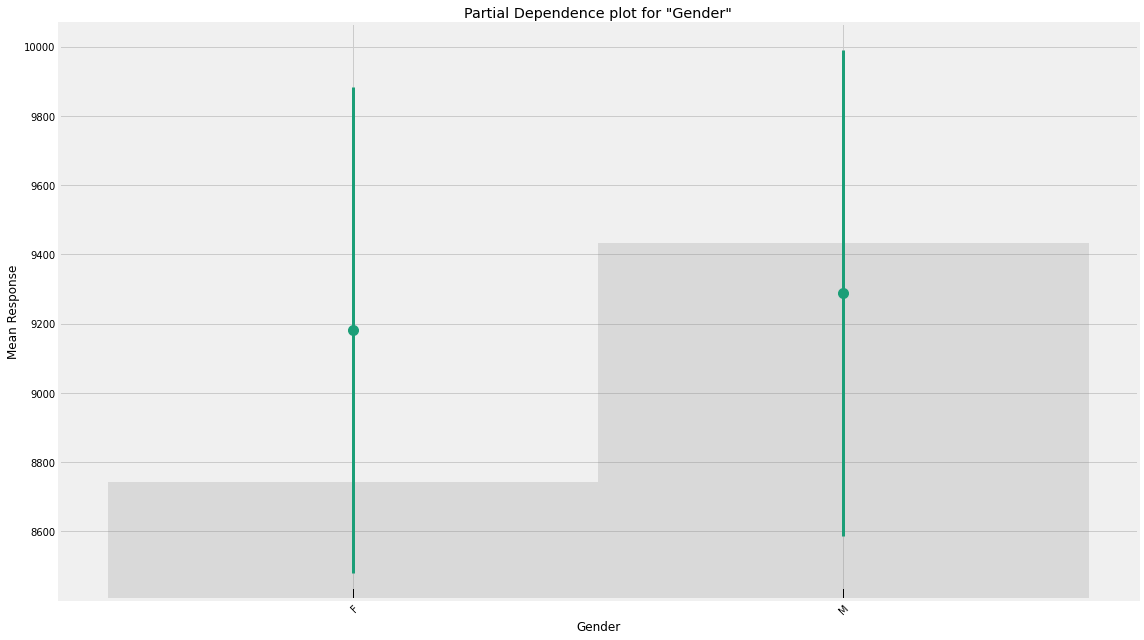

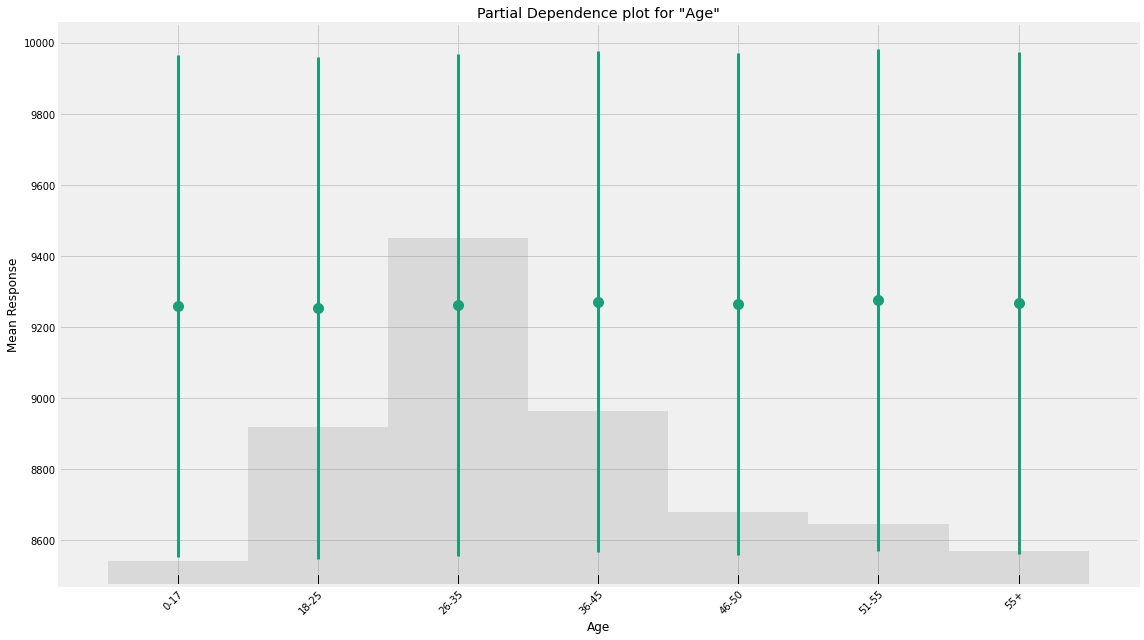

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

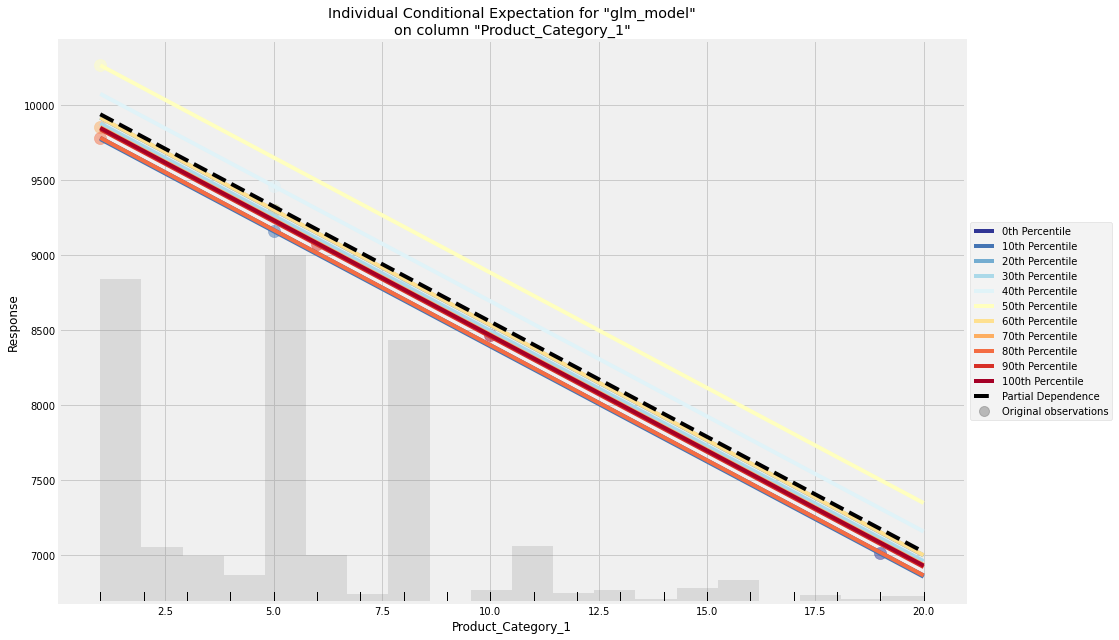

c:\Users\PHU\AppData\Local\Programs\Python\Python39\lib\site-packages\h2o\explanation\_explain.py:1714: UserWarning: Original observation of "product_category_2" for 0th Percentile is [nan, 7015.990022065291]. Plotting of NAs is not yet supported.
  warnings.warn(msg)
c:\Users\PHU\AppData\Local\Programs\Python\Python39\lib\site-packages\h2o\explanation\_explain.py:1714: UserWarning: Original observation of "product_category_2" for 20th Percentile is [nan, 9301.65311762388]. Plotting of NAs is not yet supported.
  warnings.warn(msg)
c:\Users\PHU\AppData\Local\Programs\Python\Python39\lib\site-packages\h2o\explanation\_explain.py:1714: UserWarning: Original observation of "product_category_2" for 30th Percentile is [nan, 8802.874631029572]. Plotting of NAs is not yet supported.
  warnings.warn(msg)


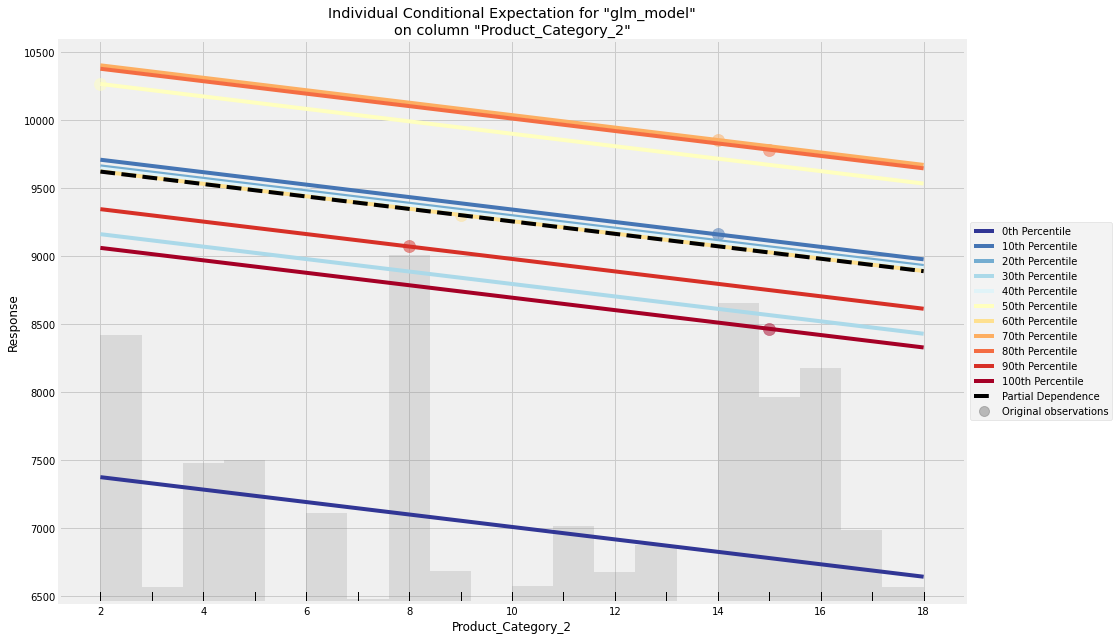

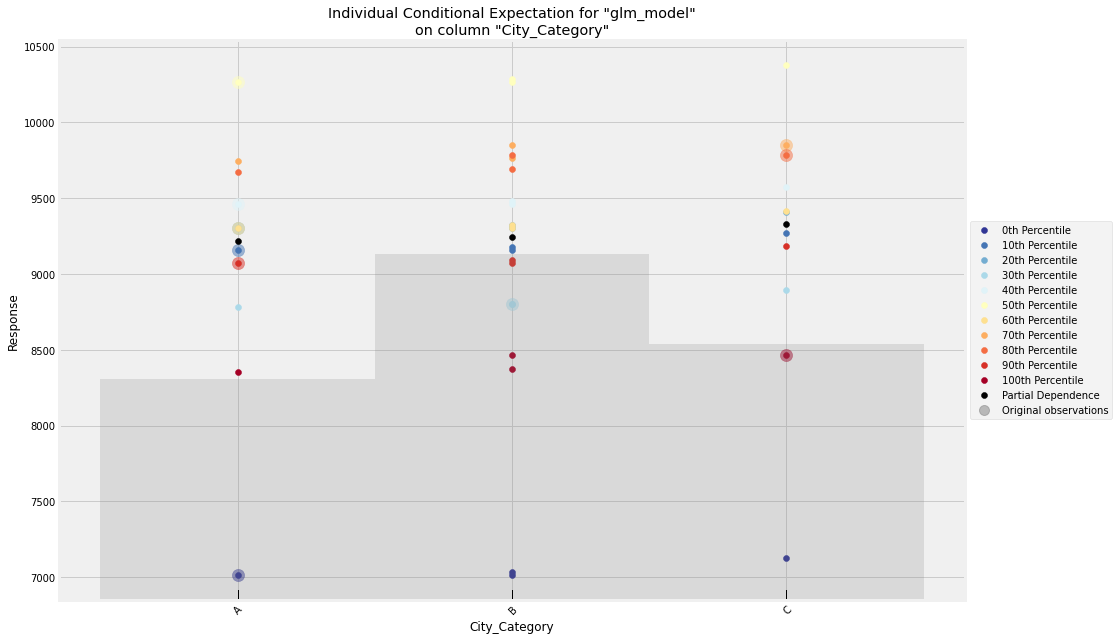

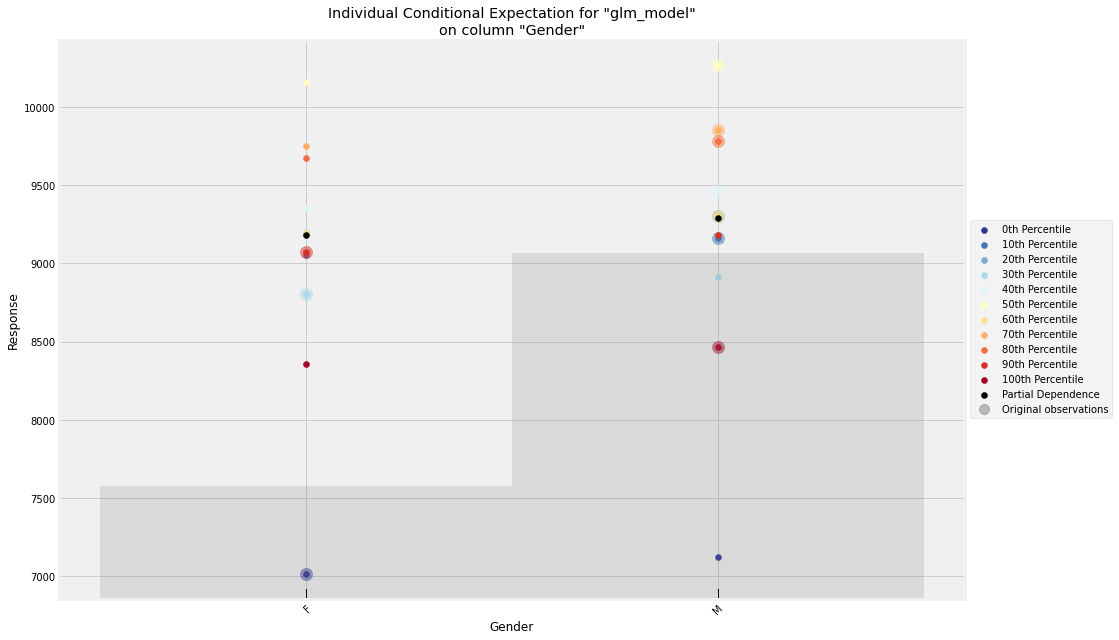

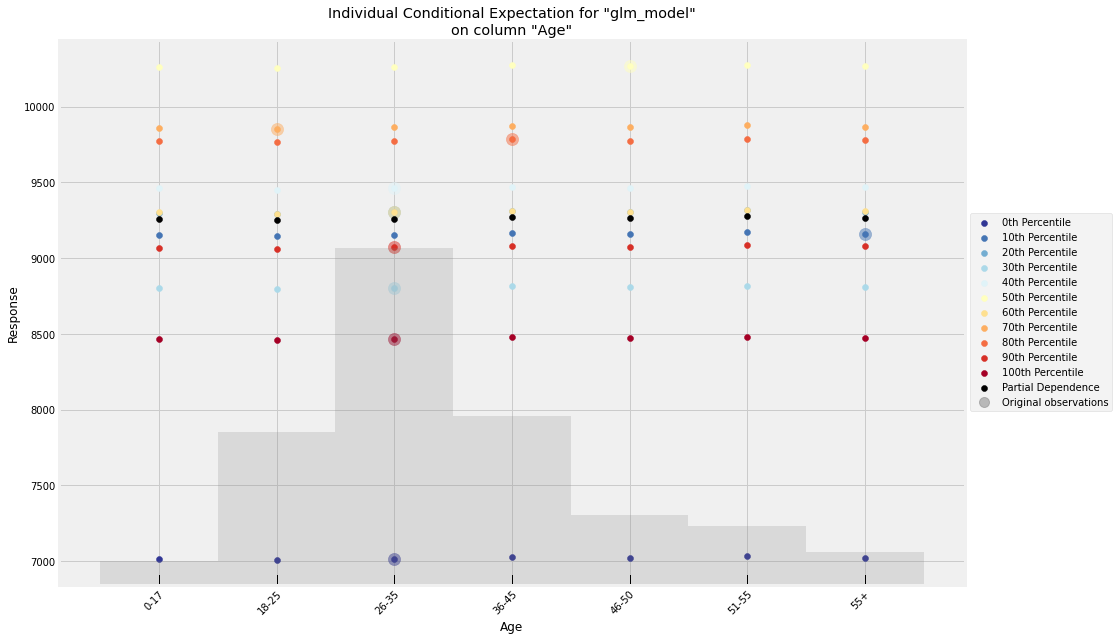

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [71]:
glm_model.explain(train_df)

In [72]:
predict = glm_model.predict(test_df)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [73]:
predict.head()

predict
9892.85
9979.38
9006.67
9389.26
9643.42
10177.5
9964.98
10115.4
8392.54
9140.22
